In [26]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv")

In [3]:
df.shape

(1309, 14)

In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Feature engineering 1, extract deck

In [9]:
df['deck'] = df['cabin'].str[0]

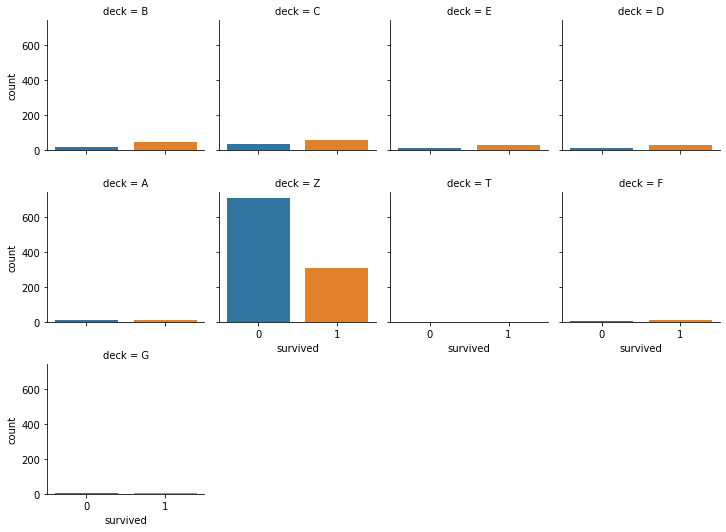

In [20]:
sns.catplot('survived', col='deck', data=df[df['deck'].notnull()], kind='count', col_wrap=4, height=2.5)

In [12]:
df['deck'].fillna('Z', inplace=True)

# Feature engineering 2, family size

In [13]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
print(df['family_size'].value_counts().sort_index())

1     790
2     235
3     159
4      43
5      22
6      25
7      16
8       8
11     11
Name: family_size, dtype: int64


In [14]:
bins = [0, 1, 4, 100]
group_names = ['singleton', 'small', 'large']
df['family_size_cat'] = pd.cut(df['family_size'], bins, labels=group_names)
print(df['family_size_cat'].value_counts())

singleton    790
small        437
large         82
Name: family_size_cat, dtype: int64


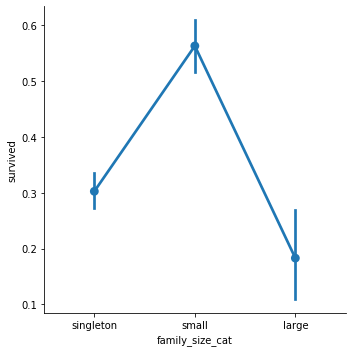

In [19]:
sns.factorplot(x="family_size_cat", y="survived", data=df)

# Feature engineering 3, length of name

In [22]:
df['name_length'] = df['name'].apply(lambda x: len(x))
print(df['name_length'].value_counts().sort_index())

12     2
13     4
14     4
15    23
16    39
17    63
18    75
19    82
20    66
21    58
22    55
23    53
24    69
25    83
26    73
27    70
28    65
29    47
30    51
31    40
32    26
33    26
34     8
35    12
36    14
37    18
38    15
39    14
40    10
41    13
42     8
43     7
44    16
45    12
46    12
47    16
48     8
49     7
50     4
51    10
52     6
53     4
54     3
55     3
56     3
57     2
58     1
59     2
61     1
62     1
63     2
65     1
67     1
82     1
Name: name_length, dtype: int64


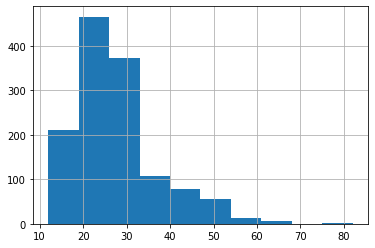

In [23]:
plt.figure()
df['name_length'].hist()
plt.show()

In [24]:
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'ok', 'good', 'long']
df['name_length_cat'] = pd.cut(df['name_length'], bins, labels=group_names)
print(df['name_length_cat'].value_counts())

ok       807
short    358
good     134
long      10
Name: name_length_cat, dtype: int64


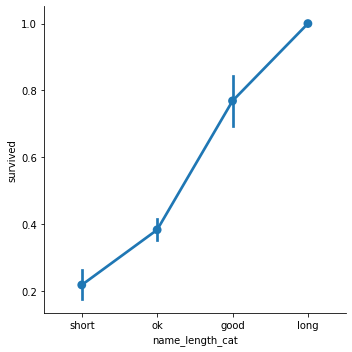

In [25]:
sns.factorplot(x="name_length_cat", y="survived", data=df)

# Feature engineering 4, fill missing embarked

In [40]:
df['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [39]:
df['embarked'].fillna('S', inplace=True)

# Feature engineering 5, LabelEncoder

In [41]:
labelEnc = LabelEncoder()

cat_vars = ['embarked', 'sex', 'family_size_cat', 'name_length_cat', 'deck']
for col in cat_vars:
    df[col] = labelEnc.fit_transform(df[col])

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,deck,family_size,family_size_cat,name_length,name_length_cat
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,2,2,NaN,"St Louis, MO",1,1,1,29,2
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,2,11,NaN,"Montreal, PQ / Chesterville, ON",2,4,2,30,2
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",2,4,2,28,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,2,NaN,135.0,"Montreal, PQ / Chesterville, ON",2,4,2,36,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",2,4,2,47,0
